# Data Exploration


In [2]:
# importing 
import h5py
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
path = "../data/processed/pfa_new/a_pfa.h5"

f = h5py.File(path, 'r')

print("Loaded dataset from {} with {} unique signs".format(path, len(f.keys())))

Loaded dataset from ../data/processed/pfa_new/a_pfa.h5 with 278 unique signs


In [4]:
test_sign = '1'

group = f[test_sign]
print("{} examples of sign {}".format(len(group.keys()), test_sign))

2743 examples of sign 1


dataset attributes: 
 type (111, 90, 3) 
 shape uint8 



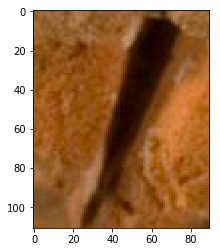

In [5]:
test_indx = list(group.keys())[60]

dset = group[test_indx]
print("dataset attributes: \n type {} \n shape {} \n".format(dset.shape, dset.dtype))
# get numpy array
dset_numpy = dset.value

# opencv image color ordering is wrong (BGR instead of RGB)
dset_corrected = dset_numpy[:,:,::-1]

plt.imshow(dset_corrected)


In [6]:
# getting counts of images by class

counts = {}

for key in f.keys():
    counts[key] = len(f[key].keys())

(array([233.,  27.,   7.,   7.,   0.,   2.,   0.,   1.,   0.,   1.]),
 array([1.0000e+00, 7.8340e+02, 1.5658e+03, 2.3482e+03, 3.1306e+03,
        3.9130e+03, 4.6954e+03, 5.4778e+03, 6.2602e+03, 7.0426e+03,
        7.8250e+03]),
 <a list of 10 Patch objects>)

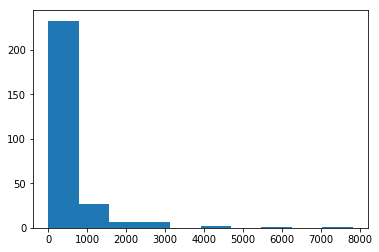

In [7]:
# histogram of counts

plt.figure()
plt.hist(counts.values())

In [8]:
# simple statistics of dataset

signs = list(counts.keys())

signs_sorted = sorted(signs, key=lambda sign: counts[sign], reverse=True)


n = 50

top_n = signs_sorted[:n]
top_n_counts = [counts[sign] for sign in top_n]
top_n_formatted = ["{}: {}".format(sign, count) for sign, count in zip(top_n, top_n_counts)]

print("top {} signs by count: \n{}".format(n, "\n".join(top_n_formatted)))
print("OTHER: {}".format(sum([counts[sign] for sign in signs_sorted[n:]])))

top 50 signs by count: 
na: 7825
HAL: 5909
iš: 4221
MEŠ: 4172
ma: 3086
1: 2743
du: 2712
da: 2674
AN: 2654
AŠ: 2538
ka₄: 2349
kur: 1991
2: 1944
ba: 1821
ra: 1768
šá: 1760
be: 1606
20: 1575
3: 1536
SAL: 1523
ul: 1424
ITI: 1262
ia: 1208
KI: 1203
MIN: 1194
hu: 1150
man: 1092
QA: 1081
me: 1067
mi: 1018
ti: 1011
um: 997
m°n: 997
ha: 953
10: 947
taš: 918
ak: 907
ri: 880
BAR: 880
4: 875
gal: 852
pu: 847
ku: 828
ir: 799
mar: 788
ip: 751
´: 746
ki: 744
an: 717
5: 693
OTHER: 24994


In [29]:
total_signs = sum(counts.values())

print("Total signs in dataset: {}".format(len(counts)))

print("Total images in dataset: {}".format(total_signs))

print("Top {} signs make up {:.2f} of dataset".format(n, sum(top_n_counts)/total_signs))

Total signs in dataset: 278
Total images in dataset: 110230
Top 50 signs make up 0.77 of dataset
